# LCPB 22-23 Exercise 4 (XGBoost) 



<center><h1>Group 2307</h1></center>


<center><style>
table {
    font-size: 24px;
}
</style></center>

| Last Name          | First Name            |Matricola number|
|--------------------|-----------------------|----------------|
| Bertinelli         | Gabriele              |1219907 (tri)   |
| Cacciola           | Martina               |2097476         |
| Pervysheva         | Yelyzaveta            |2039398         |           
| Waththe Liyanage   | Wageesha Widuranga    |2078719         |



In [1]:
import numpy as np
import matplotlib.pyplot as plt
# AdaBoost Algorithm
from sklearn.ensemble import AdaBoostClassifier
# Gradient Boosting 
from sklearn.ensemble import GradientBoostingClassifier

plt.rcParams['font.size'] = 14

In [27]:
# XGBoost 
import xgboost
from xgboost import XGBClassifier, XGBRegressor
from xgboost import plot_importance, to_graphviz, plot_tree
print("XGBoost version:",xgboost.__version__)

XGBoost version: 1.4.2


In [7]:
np.random.seed(123)

CASE = 2

S = 2
N = 2000
N_train = 1000
N_test  = N - N_train
x = S*(2*np.random.rand(N,2)-1)
y = np.zeros(N).astype(int)

for n in range(N):
    if CASE==1:
        if x[n,1]<-0.6 and x[n,0]>-0.2: y[n]=1
        if x[n,1]>0.4 and x[n,0]<-0.8: y[n]=1
        if x[n,1]>1.0 and x[n,0]>0.8: y[n]=1
    elif CASE==2:
        if x[n,1]<0 and x[n,0]>0.5: y[n]=1
        if x[n,1]>0 and np.sqrt((x[n,0]+0.3)**2+x[n,1]**2)<1.5: y[n]=1

x_train,y_train = x[:N_train],y[:N_train]
x_test,y_test = x[N_train:],y[N_train:]

[ 0.78587674 -0.85544266] 1
[-1.09259419  0.20525908] 1
[ 0.87787588 -0.30757416] 1
[1.92305679 0.73931895] 0
[-0.07627239 -0.43152993] 0


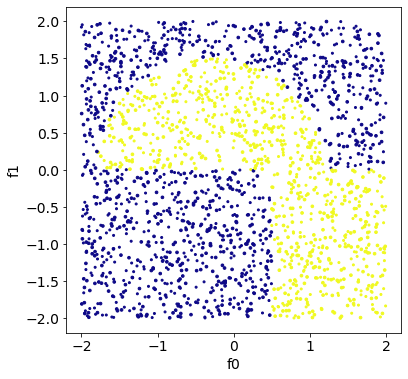

In [9]:
def scat(x,y,s=4,cmap="plasma"):
    plt.scatter(x[:,0],x[:,1],s=s,c=y,cmap=cmap)
    plt.xlabel("f0")
    plt.ylabel("f1")

for n in range(5):
    print(x[n],y[n])

plt.figure(figsize=(6,6))
scat(x_train,y_train)
scat(x_test,y_test,cmap="plasma",s=7)
plt.show()

In [10]:
def classify(clf=GradientBoostingClassifier(),show=False):
    # GradientBoostingClassifier():
    #   n_estimators = 100 (default)
    #   loss function = deviance(default) used in Logistic Regression
    # XGBClassifier()
    #   n_estimators = 100 (default)
    #   max_depth = 3 (default)
    clf.fit(x_train,y_train)
    y_hat = clf.predict(x_test)
    
    if CASE<10: print("errors: {:.2f}%".format(100*(1-clf.score(x_test, y_test))))

    dx = 0.02
    x_seq=np.arange(-S,S+dx,dx)
    nx = len(x_seq)
    x_plot=np.zeros((nx*nx,2))
    q=0
    for i in range(nx):
        for j in range(nx):
            x_plot[q,:] = [x_seq[i],x_seq[j]]
            q+=1
    y_plot= clf.predict(x_plot)

    plt.figure(figsize=(6,6))
    plt.title(str(clf))

    scat(x_plot,y_plot,cmap="winter",s=1)
    scat(x_train,y_train,s=7)
    plt.show()
    
    if show:      
        dump_list = clf.get_booster().get_dump()
        num_trees = len(dump_list)
        print("num_trees=",num_trees)
        
        fig, AX = plt.subplots(3,1,figsize=(30, 30))
        for i in range(min(3,num_trees)):
            ax=AX[i]
            plot_tree(clf, num_trees=i, ax=ax)
        fig.savefig("DATA/tree-classif.png", dpi=300, pad_inches=0.02)   
        plt.show()

C:\ProgramData\Anaconda3\envs\complab\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


errors: 1.90%


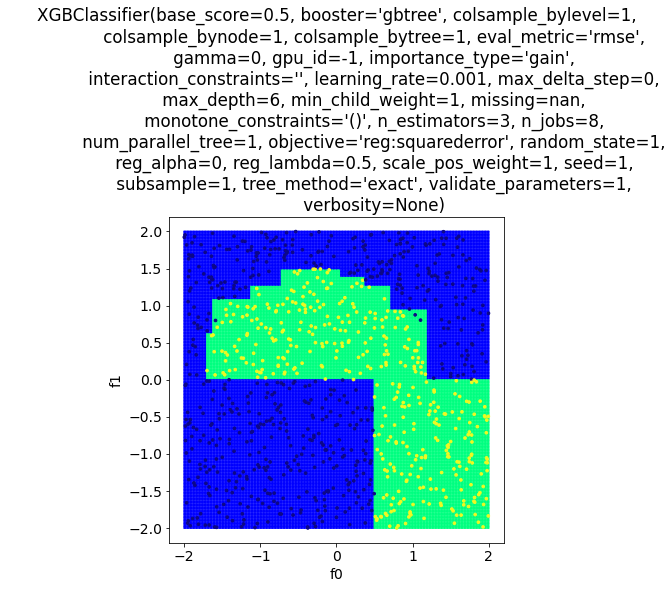

In [20]:
classify(XGBClassifier(seed=1,
                       #objective='binary:logistic',
                       objective="reg:squarederror",eval_metric="rmse",
                       learning_rate=0.001,
                       reg_lambda=0.5, n_estimators=3),show=False)

In [28]:
def fit(xgbr=XGBRegressor(),show=False):
    # GradientBoostingClassifier():
    #   n_estimators = 100 (default)
    #   loss function = deviance(default) used in Logistic Regression
    # XGBClassifier()
    #   n_estimators = 100 (default)
    #   max_depth = 3 (default)
    xgbr.fit(x_train,y_train)
    y_hat = xgbr.predict(x_test)
    print("mean squared error: {:.2f}".format(mean_squared_error(y_hat, y_test)))
    if show: 
        dx = 0.02
        x_seq=np.arange(-S,S+dx,dx)
        nx = len(x_seq)
        x_plot=np.zeros((nx*nx,2))
        q=0
        for i in range(nx):
            for j in range(nx):
                x_plot[q,:] = [x_seq[i],x_seq[j]]
                q+=1
        y_plot= xgbr.predict(x_plot)

        plt.figure(figsize=(9.5,8))
        plt.title(str(xgbr))
        scat(x_plot,y_plot,cmap="winter",s=0.2)
        plt.colorbar()
        scat(x_train,y_train,s=7)
        plt.show()
    if show:      
        dump_list = xgbr.get_booster().get_dump()
        num_trees = len(dump_list)
        print("num_trees=",num_trees)
        
        fig, AX = plt.subplots(3,1,figsize=(30, 30))
        for i in range(min(3,num_trees)):
            ax=AX[i]
            plot_tree(xgbr, num_trees=i, ax=ax)
        fig.savefig("DATA/tree-fit.png", dpi=300, pad_inches=0.02)   
        plt.show()
        #plt.savefig("net"+str(t)+".png",dpi=300)
        plt.show()

In [29]:
fit(XGBRegressor(seed=1,reg_lambda=50., n_estimators=100,max_depth=3),show=True)

NameError: name 'mean_squared_error' is not defined

In [25]:
lam=[100.,30,20.,10.,5.,1.,0.5,0.1]
for l in lam:
    print("lambda=",l)
    fit(XGBRegressor(seed=1,reg_lambda=l, n_estimators=100,max_depth=4))

lambda= 100.0


NameError: name 'mean_squared_error' is not defined